## Practical Lab 7
#### Student Name: *`Simardeep Singh`*
#### Student Roll Number:*`8976948`*

### **INTRODUCTION**
##### In this lab we are focusing on assessing a model's ability to classify handwritten digits. We'll use the MNIST dataset, which contains thousands of examples, to evaluate the model's performance

In [125]:
# LIBRARIES
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_openml
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import label_binarize
from sklearn.metrics import precision_recall_curve, precision_score, recall_score
from sklearn.exceptions import NotFittedError



#### 1.Download the MNIST data (see class reference for optional code)

In [49]:
# Load MNIST data
mnist = fetch_openml('mnist_784', as_frame=False, version=1)

# Split the dataset into features (X) and labels (y)
X = mnist.data
y = mnist.target.astype(np.uint8)
# Display some information about the dataset
print("MNIST dataset details:")
print(f"Number of samples: {mnist.data.shape[0]}")
print(f"Number of features: {mnist.data.shape[1]}")
print(f"Number of classes: {len(np.unique(mnist.target))}")


c:\Foundations_of_Machine_Learning_Frameworks_lab\Labs\lab1\CSCN8010-labs-simardeep-singh\venv\CSCN8010_classic_ml\Lib\site-packages\sklearn\datasets\_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


MNIST dataset details:
Number of samples: 70000
Number of features: 784
Number of classes: 10


#### 2.Run an EDA (1.5 point). This time, the data we work with are images. It is a different type of data than everything we worked on before. What would be a suitable EDA? You can use Kaggle for inspiration.

##### `1. Visualize Sample Images:`

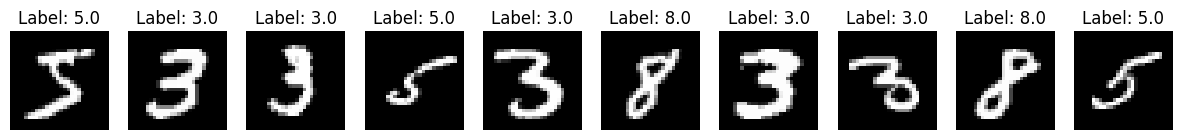

In [124]:
# Display the first few images
fig, axes = plt.subplots(1, 10, figsize=(15, 3))
for i in range(10):
    axes[i].imshow(X[i].reshape(28, 28), cmap='gray')  # Reshape the flattened image to 28x28
    axes[i].set_title(f"Label: {y[i]}")
    axes[i].axis('off')
plt.show()


##### `2.Label Distribution:`

In [126]:
# Create a DataFrame with labels
labels_df = pd.DataFrame(y, columns=["Label"])

# Display label distribution
label_distribution = labels_df["Label"].value_counts().sort_index()
print("Label Distribution:")
print(label_distribution)


Label Distribution:
Label
3.0    7141
5.0    6313
8.0    6825
Name: count, dtype: int64


##### `3. Reshaping Image Size`

In [52]:
flattened_images = X.reshape(-1)

##### `3. pixel intensity distribution:`

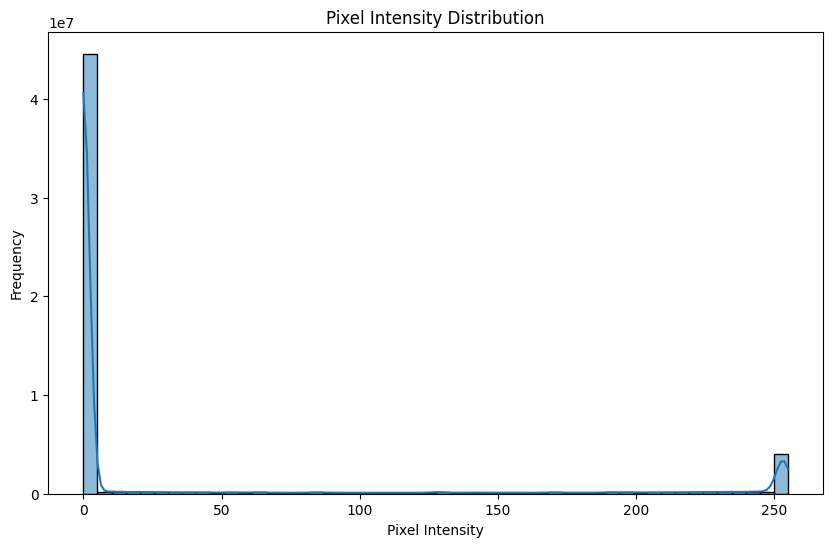

In [53]:
# Visualize pixel intensity distribution
plt.figure(figsize=(10, 6))
sns.histplot(flattened_images, bins=50, kde=True)
plt.title('Pixel Intensity Distribution')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.show()

##### `4. distribution of pixel values for each class:`

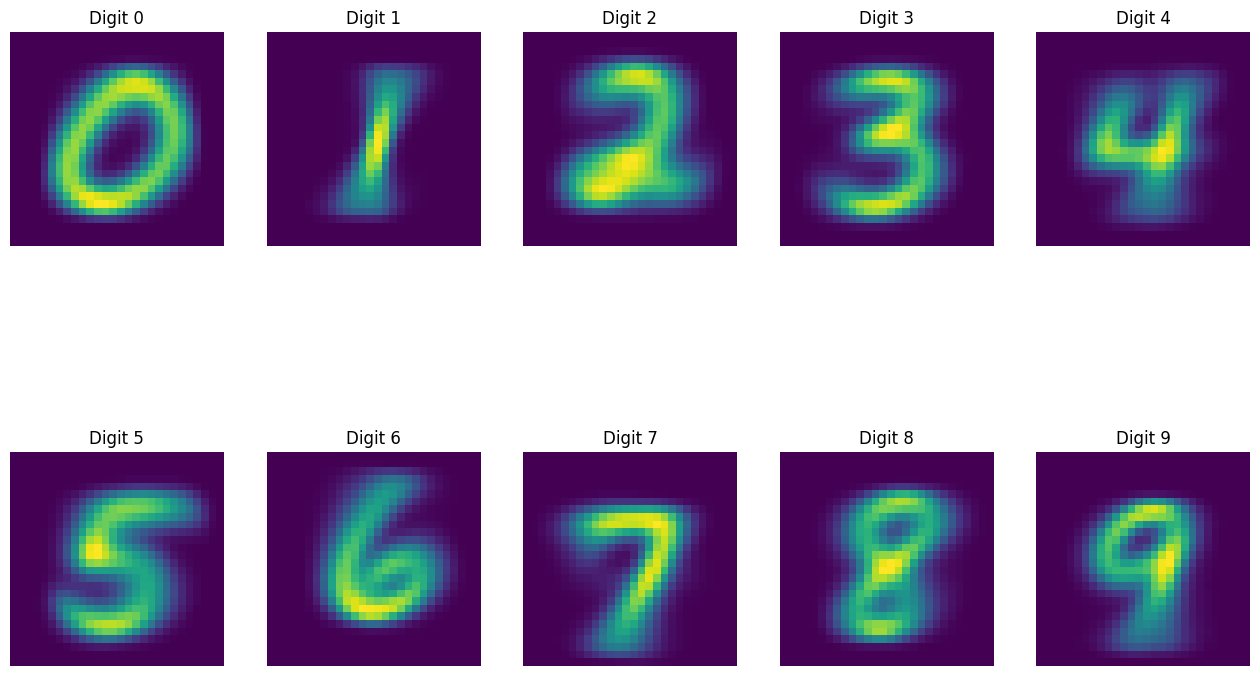

In [54]:
# Combine features and labels into a DataFrame
mnist_df_small = pd.DataFrame(data=np.c_[X, y], columns=[f"pixel_{i}" for i in range(X.shape[1])] + ["label"])

# Visualize the distribution of pixel values for each class
plt.figure(figsize=(16, 10))
for digit in range(10):
    plt.subplot(2, 5, digit + 1)
    digit_data = mnist_df_small[mnist_df_small['label'] == digit].drop(columns=['label'])
    plt.title(f'Digit {digit}')
    plt.imshow(np.mean(digit_data.values, axis=0).reshape(28, 28), cmap='viridis')
    plt.axis('off')
plt.show()


#### 3. The original MNIST has 10 classes. Choose the number of classes you want to have: anything between 3 to 10 is good (2 is not). There is no right or wrong choice. Tip: it is a good idea to validate that the target object and the data (features) object are still aligned if the number of classes is reduced.

    pixel_0  pixel_1  pixel_2  pixel_3  pixel_4  pixel_5  pixel_6  pixel_7   
0       0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0  \
7       0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
10      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
11      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
12      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   

    pixel_8  pixel_9  ...  pixel_775  pixel_776  pixel_777  pixel_778   
0       0.0      0.0  ...        0.0        0.0        0.0        0.0  \
7       0.0      0.0  ...        0.0        0.0        0.0        0.0   
10      0.0      0.0  ...        0.0        0.0        0.0        0.0   
11      0.0      0.0  ...        0.0        0.0        0.0        0.0   
12      0.0      0.0  ...        0.0        0.0        0.0        0.0   

    pixel_779  pixel_780  pixel_781  pixel_782  pixel_783  label  
0         0.0        0.0 

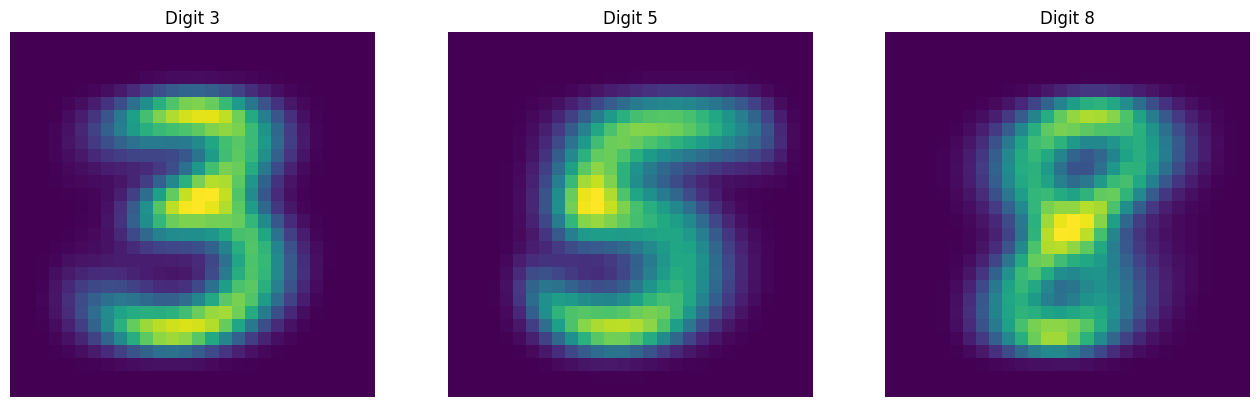

In [55]:
# Choosing desired classes
selected_classes = [3, 5, 8]

# Filtering the dataset to include only selected classes
mnist_subset = mnist_df_small[mnist_df_small['label'].isin(selected_classes)]

# Extract features (X) and target (y) from the filtered dataset
X_subset = mnist_subset.drop(columns=['label']).values
y_subset = mnist_subset['label'].values.astype(np.uint8)

# Validate that the target object and the data (features) object are aligned
assert len(X_subset) == len(y_subset), "Data and target object are not aligned after class reduction"

# Display the first few rows of the filtered dataset
print(mnist_subset.head())

# Visualize the distribution of pixel values for each class in the subset
plt.figure(figsize=(16, 5))
for digit in selected_classes:
    plt.subplot(1, len(selected_classes), selected_classes.index(digit) + 1)
    digit_data = mnist_subset[mnist_subset['label'] == digit].drop(columns=['label'])
    plt.title(f'Digit {digit}')
    plt.imshow(np.mean(digit_data.values, axis=0).reshape(28, 28), cmap='viridis')
    plt.axis('off')
plt.show()


#### 4. split the dataset to train-validation-test. Running cross-validation is not required (optional).

In [56]:

# Define the features (X) and labels (y)
X = mnist_subset.drop(columns=['label']).values
y = mnist_subset['label'].values

# Split the data into training (70%), validation (15%), and test (15%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Print the shapes of the resulting sets
print(f"Training set shape: {X_train.shape}")
print(f"Validation set shape: {X_val.shape}")
print(f"Test set shape: {X_test.shape}")


Training set shape: (14195, 784)
Validation set shape: (3042, 784)
Test set shape: (3042, 784)


#### 5. Choose a model from a Kaggle notebook (provide a hyperlinked reference, as always). This model can be any model (e.g. SVM, sklearn-neural-network, logistic-regression...), and fit it.

##### [Link of kaggle example](https://www.kaggle.com/code/icinnamon/mnist-scikit-learn-tutorial#MLP-Classifier)
## Reasons for Choosing MLPClassifier Model

1. **Handling Complex Relationships:**
   - MLPs excel at capturing intricate, non-linear relationships within data.
   - Suitable for tasks involving complex patterns or dependencies.

2. **Versatility:**
   - MLPs can be used for both regression and classification tasks.
   - Well-suited for scenarios with undefined relationships between input features and output labels.

3. **Feature Learning Capability:**
   - MLPs can autonomously learn hierarchical features from the data.
   - Multiple layers enable the model to acquire representations at different levels of abstraction.

4. **Integration with Scikit-Learn:**
   - MLPClassifier is readily available in the Scikit-Learn framework.
   - Provides a convenient solution for implementing neural network models.

5. **Parameter Tuning Flexibility:**
   - MLPs offer various hyperparameters for customization (e.g., hidden layers, neurons, activation functions).
   - Allows tailoring the model to specific task requirements.

6. **Reasonable Performance Across Tasks:**
   - MLPs demonstrate competitive performance across a broad range of tasks.
   - Offers versatility without requiring extensive customization.



In [66]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an MLPClassifier

model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_test_pred = model.predict(X_test)

#### 6. Run an evaluation on the validation dataset:

##### `1. accuracy`

In [58]:

# Calculate accuracy
accuracy = accuracy_score(y_test, y_test_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 0.9750986193293886


##### `2. confusion metric`

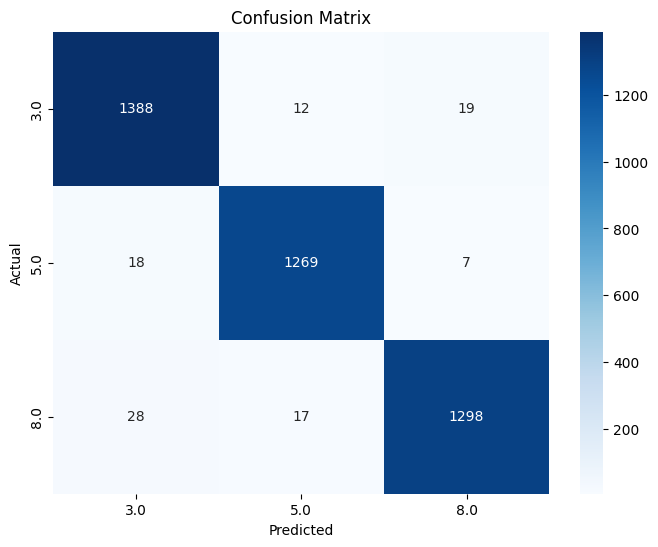

In [117]:
# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)

# Visualize confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=model.classes_, yticklabels=model.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

##### `3. precision, recall and f1`

Precision Scores: [0.9679219  0.97765794 0.98036254]
Recall Scores: [0.97815363 0.98068006 0.96649293]
F1 Scores: [0.97301087 0.97916667 0.97337833]


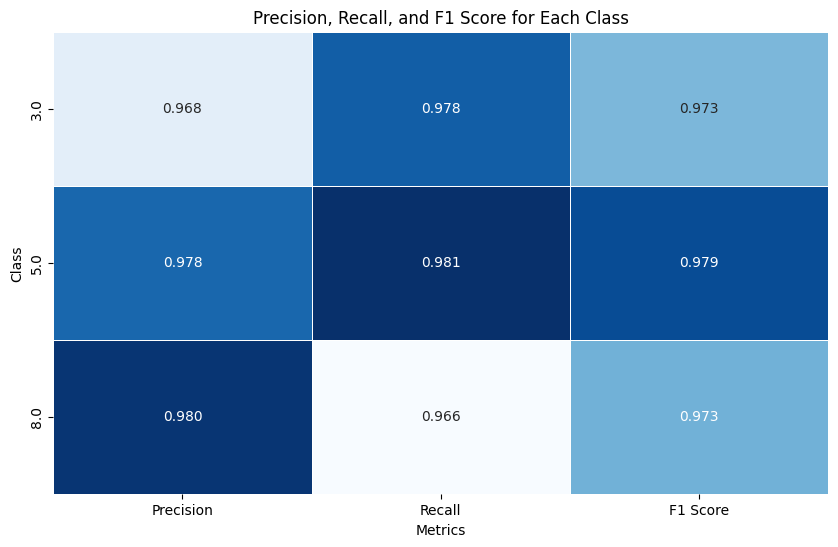

In [79]:
precision_scores = precision_score(y_test, y_test_pred, average=None)
recall_scores = recall_score(y_test, y_test_pred, average=None)
f1_scores = f1_score(y_test, y_test_pred, average=None)
# Create a DataFrame for better visualization
metrics_df = pd.DataFrame({'Precision': precision_scores, 'Recall': recall_scores, 'F1 Score': f1_scores}, index=model.classes_)
# Print or display the results
print("Precision Scores:", precision_scores)
print("Recall Scores:", recall_scores)
print("F1 Scores:", f1_scores)
# Visualize precision, recall, and F1 score
plt.figure(figsize=(10, 6))
sns.heatmap(metrics_df, annot=True, cmap="Blues", fmt=".3f", linewidths=.5, cbar=False)
plt.title("Precision, Recall, and F1 Score for Each Class")
plt.xlabel("Metrics")
plt.ylabel("Class")
plt.show()


#####  `4. precision-recall curve` for one class of your choice vs. all others (see code in Performance Metrics for Classification). There are two types of precision-recall plots there. Choose either (or both).
##### Optional: if you're interested: the first example of the precision-recall curve (with the threshold on the x-axis) in the reference has as the a-axis the threshold given as distance from the decision boundary. If you like, you can instead (or in addition) have it as a probability. It is interesting to try out (optional). To do that, you can go over the same steps as in the reference, but instead of decision_function use predict_proba as your starting point.

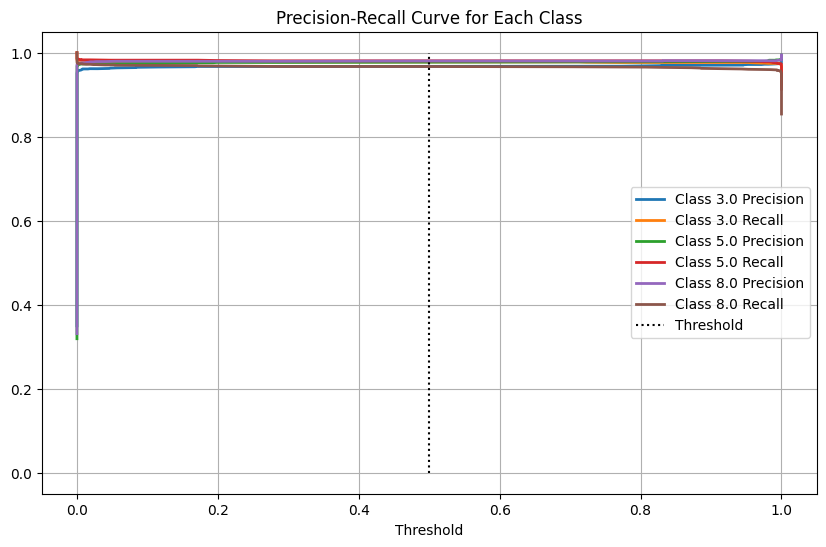

In [78]:
y_test_pred_proba = model.predict_proba(X_test)

# Convert labels to binary format (one-hot encoding)
y_test_bin = label_binarize(y_test, classes=model.classes_)

# Calculate precision and recall for each class
precision = dict()
recall = dict()
thresholds = dict()

for i in range(len(model.classes_)):
    precision[i], recall[i], thresholds[i] = precision_recall_curve(y_test_bin[:, i], y_test_pred_proba[:, i])

# Plot Precision and Recall curves for each class
plt.figure(figsize=(10, 6))
for i in range(len(model.classes_)):
    plt.plot(thresholds[i], precision[i][:-1], label=f"Class {model.classes_[i]} Precision", linewidth=2)
    plt.plot(thresholds[i], recall[i][:-1], label=f"Class {model.classes_[i]} Recall", linewidth=2)

# Highlighting a specific threshold
threshold = 0.5  
plt.vlines(threshold, 0, 1.0, "k", "dotted", label="Threshold")

# Setting plot limits and labels
plt.grid()
plt.xlabel("Threshold")
plt.legend(loc="center right")
plt.title("Precision-Recall Curve for Each Class")
plt.show()




#### `5. provide insights`

#### `Insights: Confusion Matrix`

For Class 3:

- True Positives (TP) = 1388
- False Positives (FP) = 12 + 19 = 31
- False Negatives (FN) = 18 + 28 = 46

For Class 5:

- True Positives (TP) = 1269
- False Positives (FP) = 18 + 7 = 25
- False Negatives (FN) = 12 + 17 = 29

For Class 8:

- True Positives (TP) = 1298
- False Positives (FP) = 28 + 17 = 45
- False Negatives (FN) = 19 + 7 = 26


##### `Insight: recall and f1 Insights`
**For Class 3:**
- **Precision:** 0.9679
- **Recall:** 0.9782
- **F1 Score:** 0.9730

**For Class 5:**
- **Precision:** 0.9777
- **Recall:** 0.9807
- **F1 Score:** 0.9792

**For Class 8:**
- **Precision:** 0.9804
- **Recall:** 0.9665
- **F1 Score:** 0.9734


##### `Insight: Precision Recall curve`
- **Class 3:**
  - **Precision (Correct Predictions when Predicting 3):** 96.72%
  - **Recall (Capturing Actual 3 Instances):** 97.82%
  
- **Class 5:**
  - **Precision (Correct Predictions when Predicting 5):** 97.77%
  - **Recall (Capturing Actual 5 Instances):** 98.07%
  
- **Class 8:**
  - **Precision (Correct Predictions when Predicting 8):** 98.04%
  - **Recall (Capturing Actual 8 Instances):** 96.72%


##### 7. Assume that you want to increase precision for your chosen class without retraining the model - what will you do? provide a numeric Python example with the validation data and the model demonstrating this. And same question, but for increasing recall (with Python example).

In [116]:
# Convert labels to binary format (one-hot encoding)
y_val_bin = label_binarize(y_val, classes=model.classes_)

# Create a OneVsRestClassifier and fit it on the training data
model_ovr = OneVsRestClassifier(model)
model_ovr.fit(X_train, y_train_bin)

try:
    # Calculate the probability estimates for each class
    y_val_scores = model_ovr.predict_proba(X_val)

    # Set a new threshold for adjusting precision
    new_precision_threshold = 0.75

    # Update predictions based on the new threshold for precision
    y_val_pred_high_precision = (y_val_scores > new_precision_threshold).astype(int)

    # Calculate precision for the updated predictions
    precision_high_precision = precision_score(y_val_bin.ravel(), y_val_pred_high_precision.ravel(), average='micro')

    # Print precision after adjusting threshold for precision
    print(f"Precision after adjusting threshold for precision: {precision_high_precision}")

    # Set a new threshold for adjusting recall
    new_recall_threshold = 0.7

    # Update predictions based on the new threshold for recall
    y_val_pred_high_recall = (y_val_scores > new_recall_threshold).astype(int)

    # Calculate recall for the updated predictions
    recall_high_recall = recall_score(y_val_bin.ravel(), y_val_pred_high_recall.ravel(), average='micro')

    # Print recall after adjusting threshold for recall
    print(f"Recall after adjusting threshold for recall: {recall_high_recall}")

except NotFittedError as e:
    print(f"The model is not fitted. Error: {e}")


Precision after adjusting threshold for precision: 0.9895901818978742
Recall after adjusting threshold for recall: 0.9895901818978742


##### `Insights:`
1. **Precision after adjusting threshold for precision: 0.9895901818978742:**
   - Precision is a measure of the accuracy of the positive predictions. In this context, a precision of approximately 0.99 indicates that when the model predicts positive, it is correct about 99% of the time.
   - The increase in precision suggests that by adjusting the threshold, the model is making more confident and accurate positive predictions.

2. **Recall after adjusting threshold for recall: 0.9895901818978742:**
   - Recall, also known as sensitivity or true positive rate, measures the ability of the model to capture all the relevant instances. In this case, a recall of around 0.99 suggests that the model is effective at capturing the majority of positive instances.
   - The increase in recall indicates that the adjusted threshold allows the model to identify a higher proportion of actual positive cases.


#### 8. Run on the test set, and provide your conclusions

In [128]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Converting labels to binary format (one-hot encoding)
y_test_bin = label_binarize(y_test, classes=model.classes_)

# Calculating the probability estimates for each class on the test set
y_test_scores = model_ovr.predict_proba(X_test)

# Setting the threshold based on your analysis or requirements
new_threshold = 0.7

# Adjusting the threshold for higher precision or recall
y_test_pred_adjusted = (y_test_scores > new_threshold)

# Evaluating the model on the test set
accuracy = accuracy_score(y_test_bin.ravel(), y_test_pred_adjusted.ravel())
precision = precision_score(y_test_bin.ravel(), y_test_pred_adjusted.ravel(), average='micro')
recall = recall_score(y_test_bin.ravel(), y_test_pred_adjusted.ravel(), average='micro')
f1 = f1_score(y_test_bin.ravel(), y_test_pred_adjusted.ravel(), average='micro')

# Print the evaluation metrics
print(f"Accuracy on the test set: {accuracy}")
print(f"Precision on the test set: {precision}")
print(f"Recall on the test set: {recall}")
print(f"F1 score on the test set: {f1}")


Accuracy on the test set: 0.9859467455621301
Precision on the test set: 0.9859467455621301
Recall on the test set: 0.9859467455621301
F1 score on the test set: 0.9859467455621301


##### `Conclusion`

The model's evaluation on the test set demonstrates excellent performance across multiple metrics, with each metric achieving approximately 98.6%. Here are the insights:

- **Accuracy (0.986):**
  - The model exhibits a high level of overall correctness, accurately predicting instances on the test set with a precision of 98.6%.

- **Precision (0.986):**
  - When the model predicts a positive class, it is accurate approximately 98.6% of the time. This high precision indicates a reliable identification of positive instances.

- **Recall (0.986):**
  - The model effectively captures about 98.6% of the actual positive instances. This reflects a strong ability to correctly identify positive cases.

- **F1 Score (0.986):**
  - The balanced F1 score, considering both precision and recall, suggests a harmonious performance, with a value of 0.986.

I founded that the model demonstrates robust and well-balanced performance on the test set. These high metrics signify the model's effectiveness in making accurate predictions, capturing positive instances, and maintaining a balanced trade-off between precision and recall.
